# **Project Title:**

 Predictive Analysis of Depression in Students using Feature Selection Techniques




# **Aim**

Mental health among students is an increasingly critical issue in today's high-pressure academic environments. This project explored a real-world dataset containing demographic, academic, and lifestyle information from over 27,000 students. The primary objective was to identify the most influential factors contributing to student depression and prepare the dataset for predictive modeling.

# **Objective**

To uncover key predictors of depression in students by leveraging robust feature selection techniques, and provide meaningful insights that can inform preventive strategies and interventions.

# **Dataset Overview**

Name: Student Depression Dataset

Rows: 27,901

Features: 18

Target Variable: Depression (0 = No, 1 = Yes)

Feature Types: Categorical, Numerical, Ordinal

Features included variables such as:

- id – Unique identifier for each record

- Gender – Student’s gender (Male/Female)

- Age – Age of the student

- City – City of residence

- Profession – Profession (e.g., Student)

- Academic Pressure – Level of academic pressure (numeric scale)

- Work Pressure – Work-related pressure (numeric scale)

- CGPA – Academic performance (Cumulative Grade Point Average)

- Study Satisfaction – Satisfaction with current academic experience

- Job Satisfaction – Satisfaction with part-time/full-time work (if any)

- Sleep Duration – Average sleep hours (e.g., '5-6 hours')

- Dietary Habits – Eating habits (Healthy/Moderate/Unhealthy)

- Degree – Educational qualification (e.g., B.Sc, M.Tech)

- Have you ever had suicidal thoughts? – Yes/No response

- Work/Study Hours – Daily study or work hours

- Financial Stress – Self-reported financial pressure (scale or categorical)

- Family History of Mental Illness – Yes/No

- Depression – Target variable (0 = No Depression, 1 = Depression)

# Phase 1 : Data Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_depression_dataset.csv to student_depression_dataset.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the dataset
df = pd.read_csv('student_depression_dataset.csv')  # change path if needed

# Step 3: Drop unnecessary ID column
df.drop(columns=['id'], inplace=True)

# Step 4: Convert Yes/No columns to binary
df['Suicidal_Thoughts'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df['Family_History'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
df.drop(columns=['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'], inplace=True)

# Step 5: Map ordinal values to numbers
sleep_map = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'": 4,
    "'Irregular'": 0
}
df['Sleep_Duration'] = df['Sleep Duration'].map(sleep_map)
diet_map = {
    'Healthy': 2,
    'Moderate': 1,
    'Unhealthy': 0,
    'Irregular': 0
}
df['Dietary_Habits'] = df['Dietary Habits'].map(diet_map)

# Convert Financial Stress to numeric
df['Financial_Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')
df.drop(columns=['Sleep Duration', 'Financial Stress'], inplace=True)

# Step 6: Label Encode remaining categorical columns
label_cols = ['Gender', 'City', 'Profession', 'Degree']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Step 7: Handle missing values (if any)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Step 8: Final check
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              27901 non-null  int64  
 1   Age                 27901 non-null  float64
 2   City                27901 non-null  int64  
 3   Profession          27901 non-null  int64  
 4   Academic Pressure   27901 non-null  float64
 5   Work Pressure       27901 non-null  float64
 6   CGPA                27901 non-null  float64
 7   Study Satisfaction  27901 non-null  float64
 8   Job Satisfaction    27901 non-null  float64
 9   Dietary Habits      27901 non-null  object 
 10  Degree              27901 non-null  int64  
 11  Work/Study Hours    27901 non-null  float64
 12  Depression          27901 non-null  int64  
 13  Suicidal_Thoughts   27901 non-null  int64  
 14  Family_History      27901 non-null  int64  
 15  Sleep_Duration      27901 non-null  float64
 16  Diet

<ipython-input-3-0a0977cc9d71>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


1.2 Basic Info and Summary Statistics

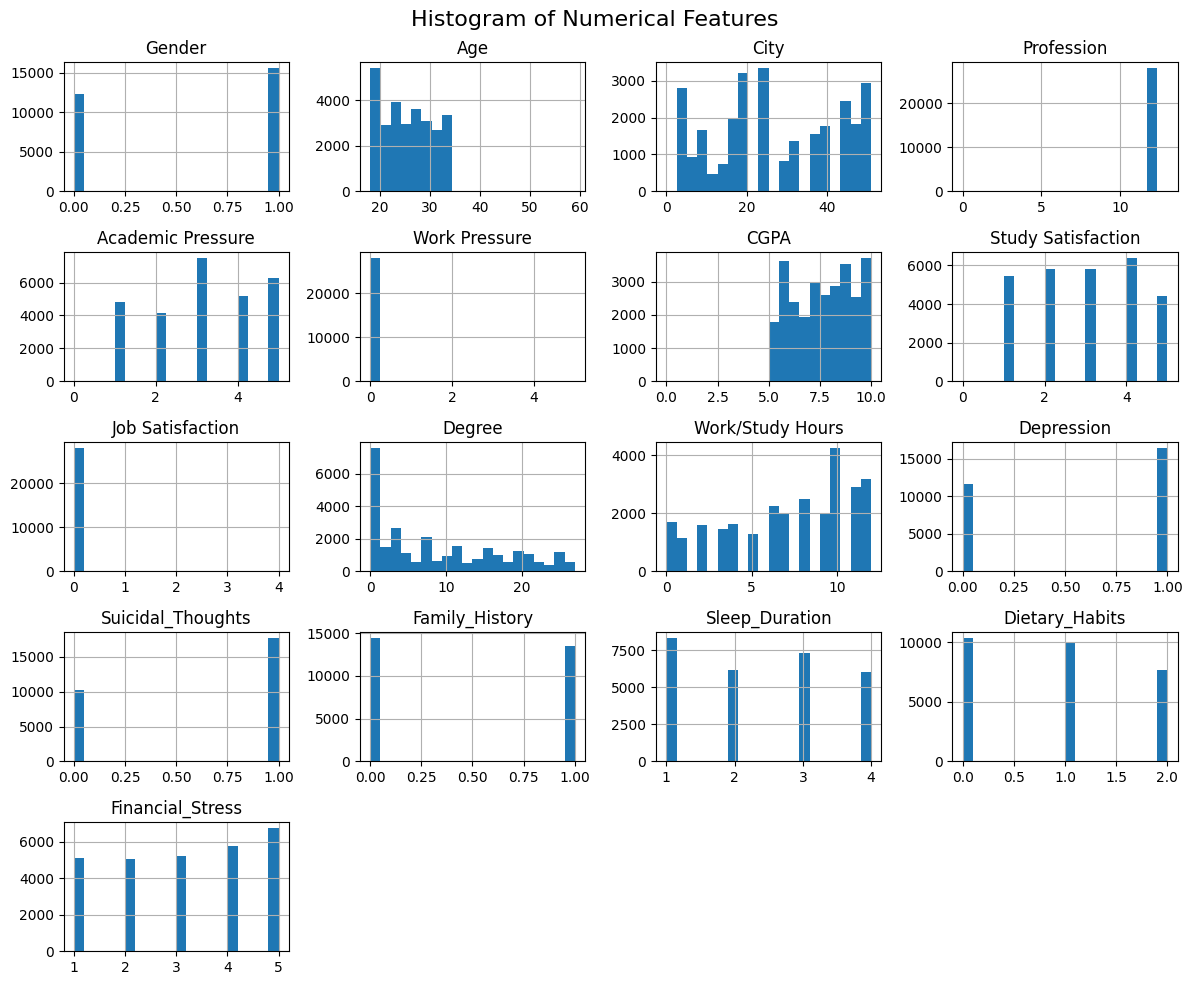

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Phase 2: Visualization

2.1 Histograms for Numeric Data

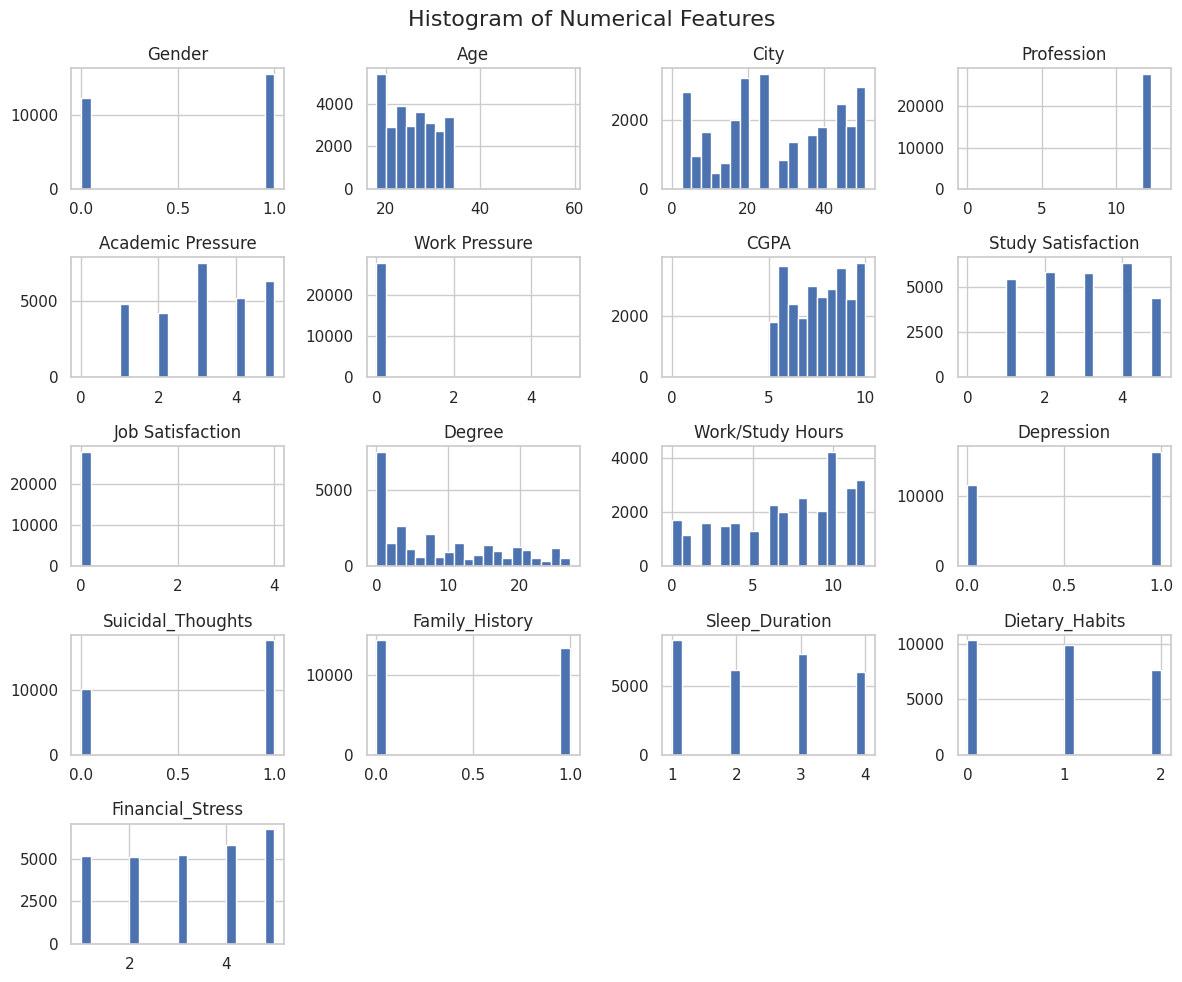

In [ ]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()




2.2 Box Plots for Outlier Detection

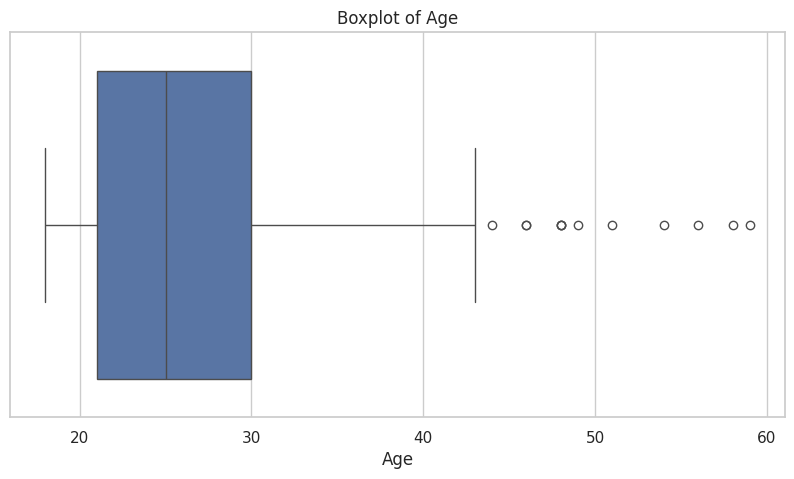

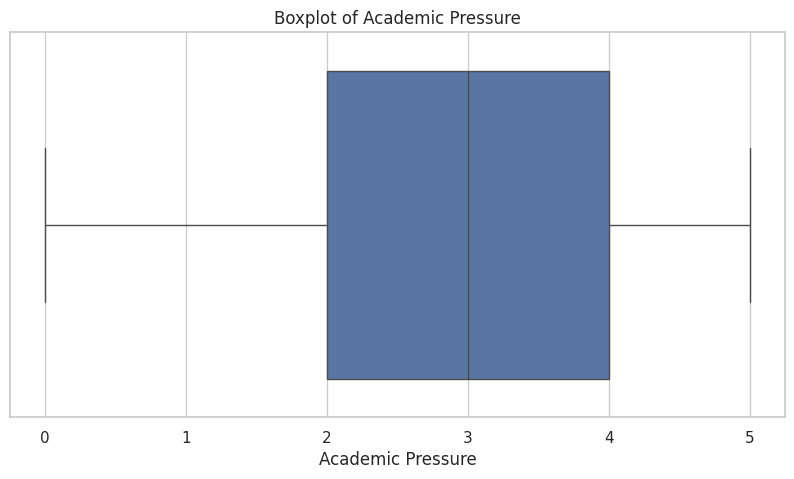

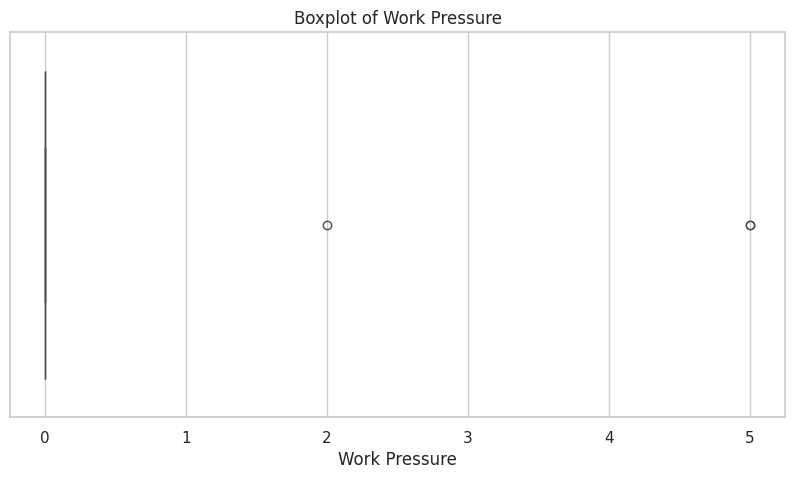

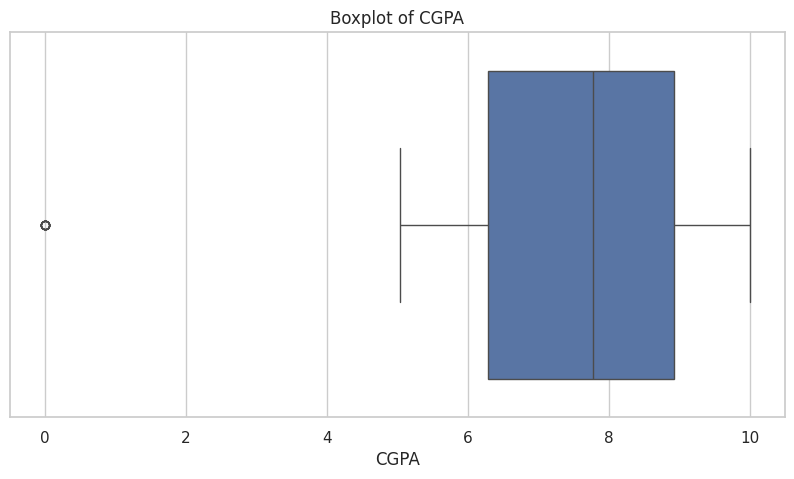

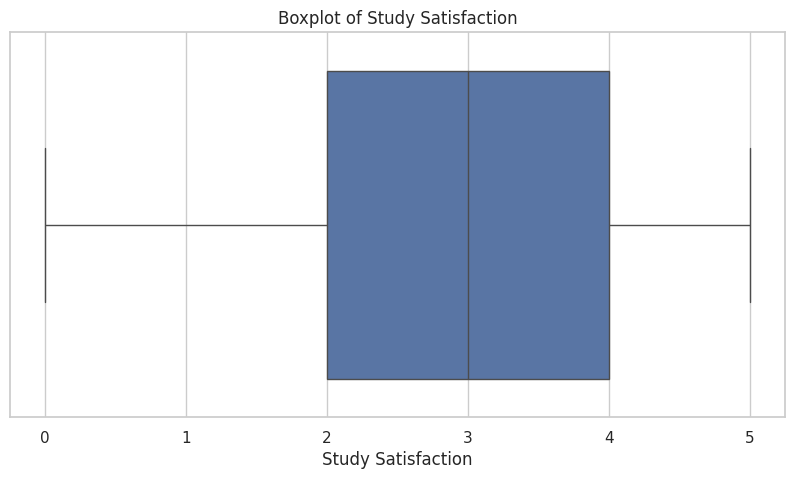

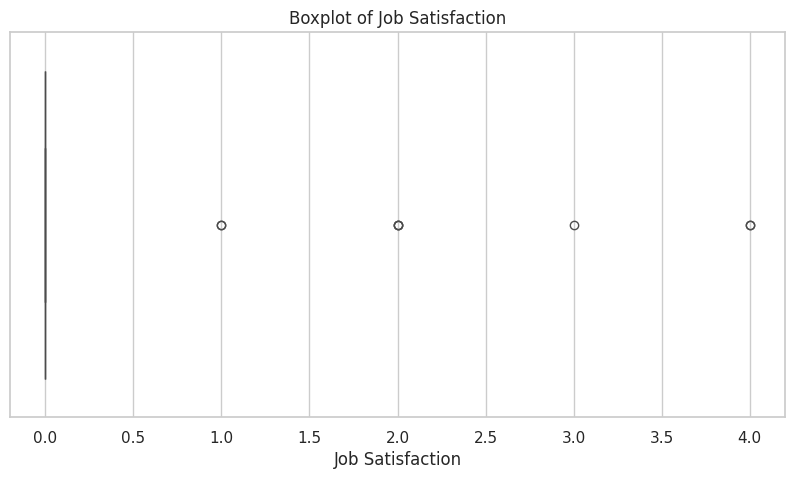

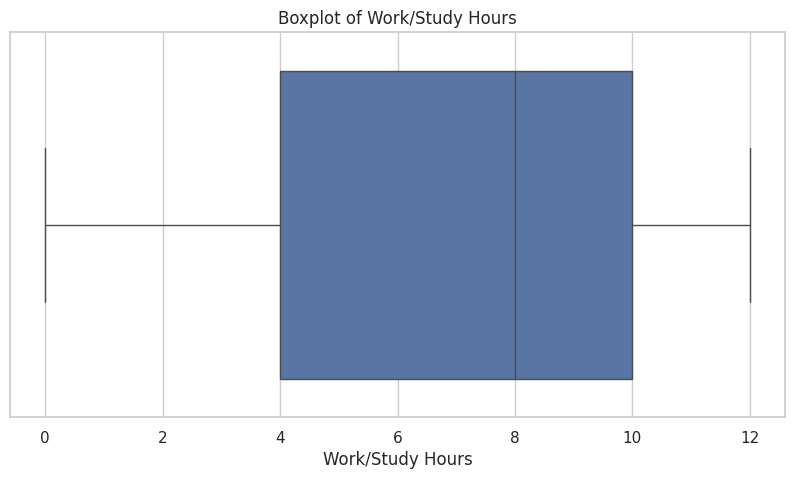

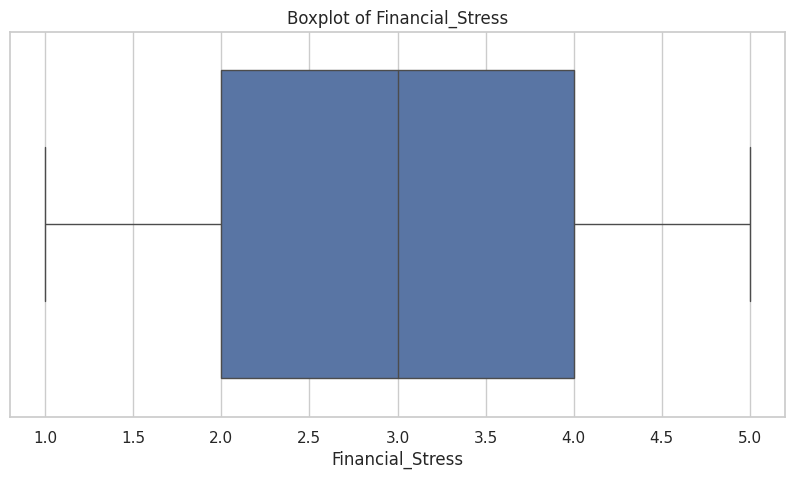

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numeric_columns = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial_Stress'
]


for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()




In [ ]:
print(df.columns.tolist())

['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits', 'Degree', 'Work/Study Hours', 'Depression', 'Suicidal_Thoughts', 'Family_History', 'Sleep_Duration', 'Dietary_Habits', 'Financial_Stress']


2.3 Bar Charts for Categorical Data


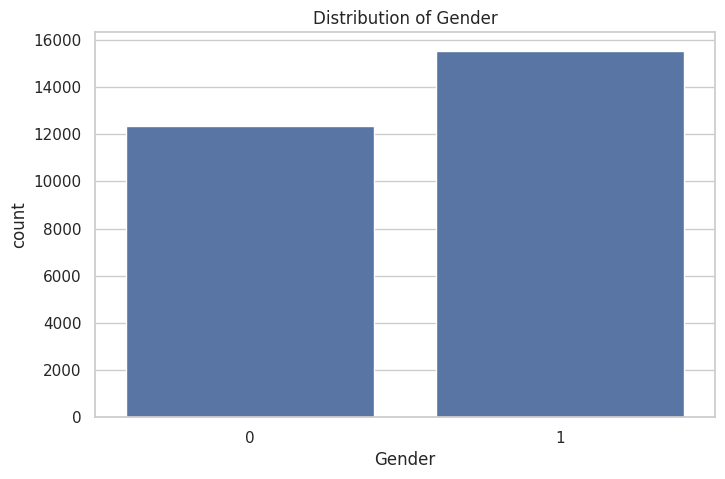

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

2.4 Correlation Heatmap

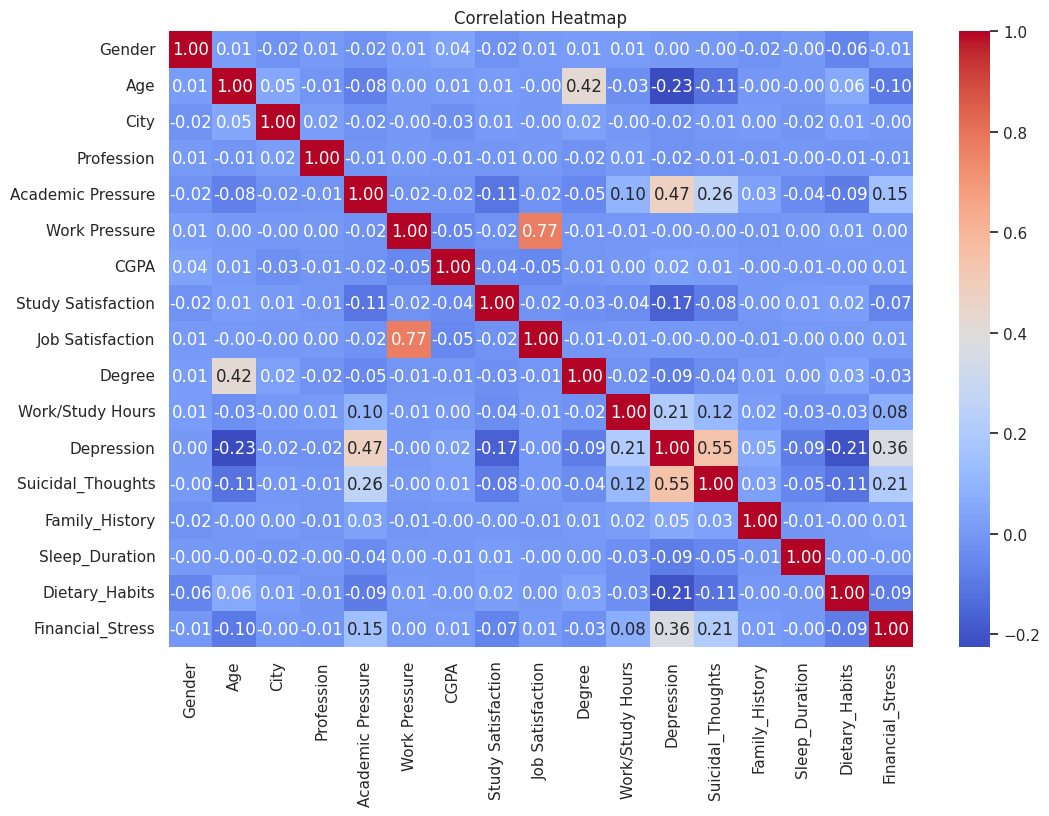

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

2.5 Handling Missing Data

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

2.6 Remove Outliers Using Z-Score

In [ ]:
from scipy.stats import zscore

# Select numerical columns
num_cols = ['Age', 'CGPA', 'Work/Study Hours', 'Academic Pressure', 'Work Pressure']

# Compute Z-scores
z_scores = df[num_cols].apply(zscore)

# Filter rows where all Z-scores are within [-3, 3]
df_no_outliers = df[(z_scores.abs() <= 3).all(axis=1)]

# Display shape before and after
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

# Optionally, save the cleaned dataset
df_no_outliers.to_csv("cleaned_student_depression_dataset.csv", index=False)


Original shape: (27901, 18)
Shape after removing outliers: (27873, 18)


2.7 Encode Categorical Variables using OneHot Encoder.

In [ ]:
import pandas as pd


cat_cols = df.select_dtypes(include='object').columns

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)


Original shape: (27901, 18)
Encoded shape: (27901, 20)


2.8 Code to Scale Numeric Functions

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Show preview
print(df_encoded.head())

df_encoded.to_csv("student_depression_scaled.csv", index=False)


     Gender       Age      City  Profession  Academic Pressure  Work Pressure  \
0  0.891416  1.463165  1.535530     0.02642           1.345543      -0.009777   
1 -1.121811 -0.371474 -1.434295     0.02642          -0.826104      -0.009777   
2  0.891416  1.055467  1.083600     0.02642          -0.102222      -0.009777   
3 -1.121811  0.443921  1.406408     0.02642          -0.102222      -0.009777   
4 -1.121811 -0.167625 -0.594997     0.02642           0.621660      -0.009777   

       CGPA  Study Satisfaction  Job Satisfaction    Degree  Work/Study Hours  \
0  0.893393           -0.693425          -0.01534 -0.594731         -1.121213   
1 -1.194076            1.510636          -0.01534  0.246705         -1.121213   
2 -0.425724            1.510636          -0.01534 -0.354321          0.497095   
3 -1.404862           -0.693425          -0.01534 -0.113911         -0.851495   
4  0.322229            0.041262          -0.01534  0.967935         -1.660650   

   Depression  Suicidal_Th

# Phase 3: Feature Selection

3.1 Correlation Matrix – for numeric features

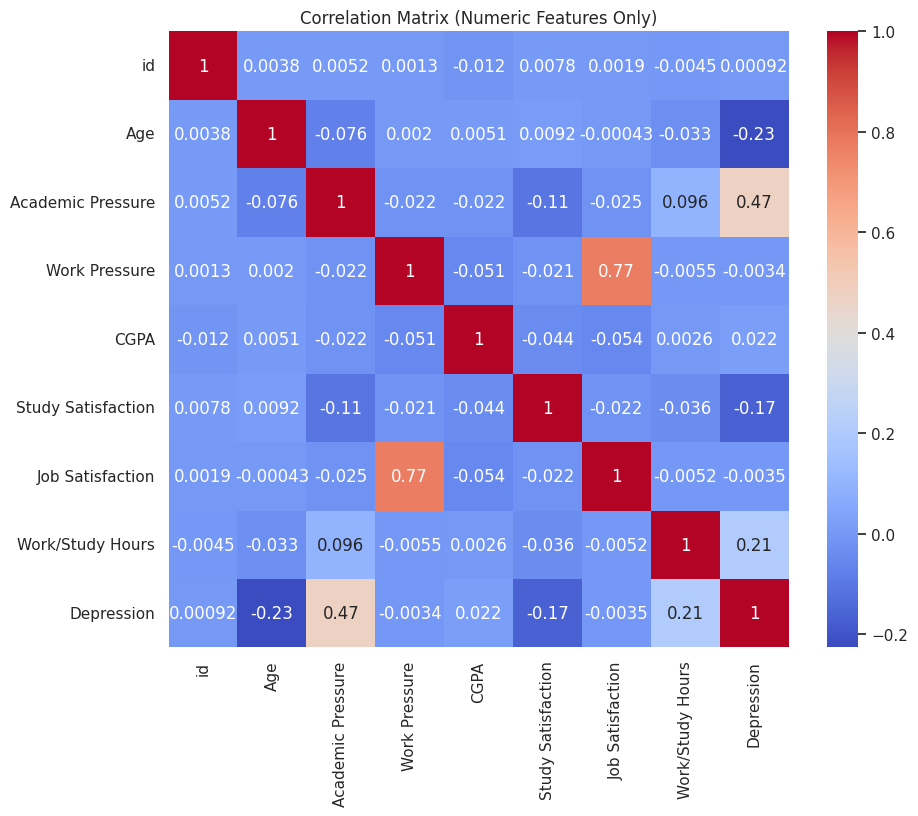

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student_depression_dataset.csv')

#only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

3.2 Chi-Square Test

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Encode categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define X (features) and y (target)
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

# Apply chi-square test
chi_scores = chi2(X, y)

# Display results
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores[0], 'p-value': chi_scores[1]})
chi2_results.sort_values(by='Chi2 Score', ascending=False, inplace=True)
print(chi2_results)


                                  Feature   Chi2 Score        p-value
5                       Academic Pressure  3821.833425   0.000000e+00
15                       Financial Stress  3557.476357   0.000000e+00
13  Have you ever had suicidal thoughts ?  3057.294614   0.000000e+00
14                       Work/Study Hours  2331.007175   0.000000e+00
12                                 Degree  1629.322633   0.000000e+00
2                                     Age  1333.049964  7.431387e-292
11                         Dietary Habits  1248.711851  1.581353e-273
0                                      id   557.480304  2.969886e-123
8                      Study Satisfaction   495.417900  9.439564e-110
3                                    City   146.570269   9.742568e-34
16       Family History of Mental Illness    41.103170   1.444020e-10
10                         Sleep Duration    10.478948   1.207425e-03
7                                    CGPA     3.888342   4.862242e-02
6                   

relation to depression


3.3 Mutual Information


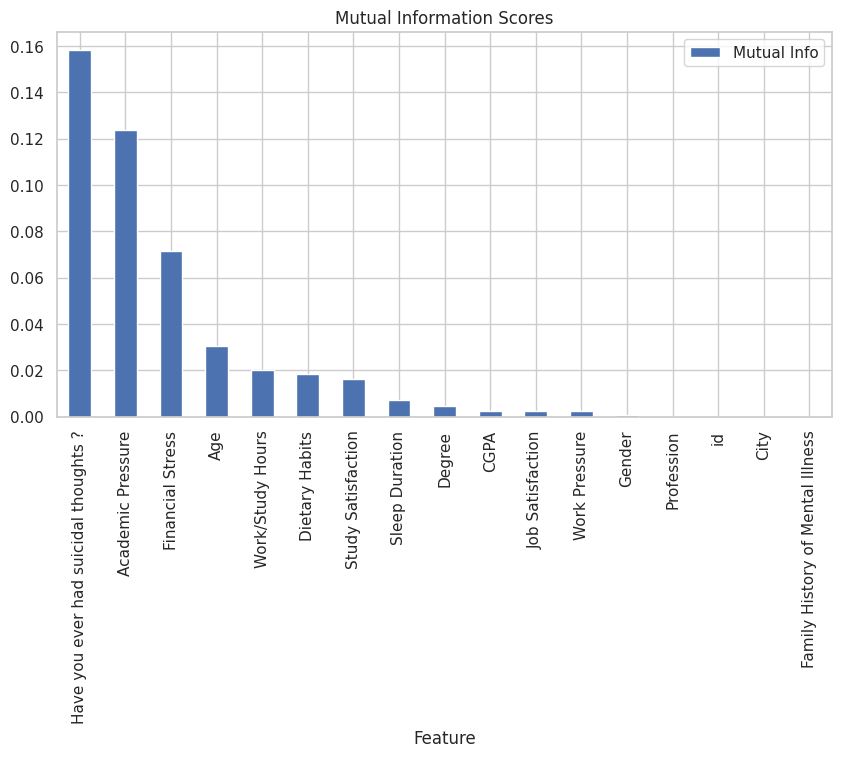

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info': mutual_info})
mi_df.sort_values(by='Mutual Info', ascending=False).plot(x='Feature', y='Mutual Info', kind='bar', figsize=(10,5))
plt.title('Mutual Information Scores')
plt.show()

3.4 Feature Selection Methods

a. Filter Method — Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
mi_df.head()


,Feature,MI Score
13,Have you ever had suicidal thoughts ?,0.157499
5,Academic Pressure,0.124283
15,Financial Stress,0.066204
2,Age,0.034810
11,Dietary Habits,0.025127


b. Wrapper Method — RFE

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply RFE on scaled data
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_scaled, y)

# Get top features
rfe_features = X.columns[rfe.support_]
print("Top RFE Features:", list(rfe_features))

Top RFE Features: ['Age', 'Academic Pressure', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress']


c. Embedded Method — Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)
tree_importance = tree.feature_importances_
tree_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree_importance})
tree_df = tree_df.sort_values(by='Importance', ascending=False)
tree_df.head()

,Feature,Importance
13,Have you ever had suicidal thoughts ?,0.298418
5,Academic Pressure,0.132755
0,id,0.093564
7,CGPA,0.077204
15,Financial Stress,0.069449


# Phase 4: Compare and Count Frequently Selected Features

In [ ]:
# Combine selected top features from each method
top_mi = list(mi_df['Feature'].head(5))
top_rfe = list(rfe_features)
top_tree = list(tree_df['Feature'].head(5))

# Count feature frequency
from collections import Counter
all_selected = top_mi + top_rfe + top_tree
feature_counts = Counter(all_selected)

# Display features sorted by frequency
final_features = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['Count'])
final_features = final_features.sort_values(by='Count', ascending=False)
print(final_features)


                                       Count
Have you ever had suicidal thoughts ?      3
Academic Pressure                          3
Financial Stress                           3
Age                                        2
Dietary Habits                             1
Work/Study Hours                           1
id                                         1
CGPA                                       1


# Phase 5: Evaluation and Visualization

Objective:
To justify why the selected features are important and visually communicate their relevance to your model and project goal (predicting student depression).

5.1 Visualize Feature Importance


a. Bar Chart – Top Features by Mutual Information

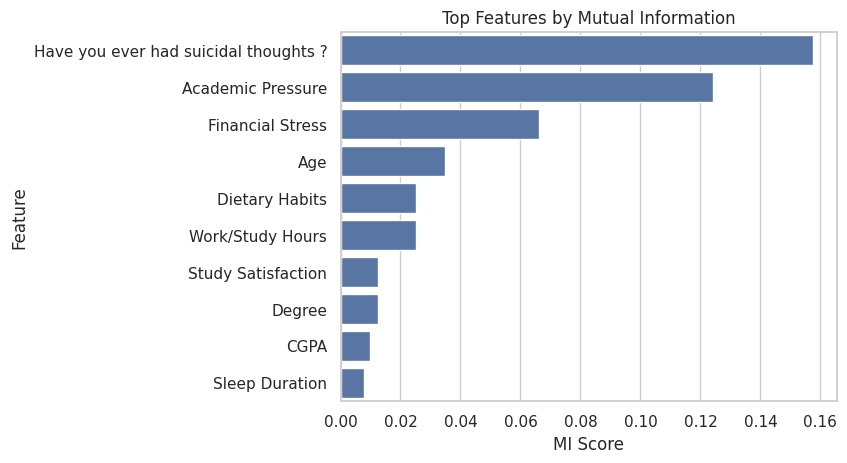

In [ ]:
sns.barplot(x='MI Score', y='Feature', data=mi_df.head(10))
plt.title('Top Features by Mutual Information')
plt.show()

b. Bar Chart – Decision Tree Importance

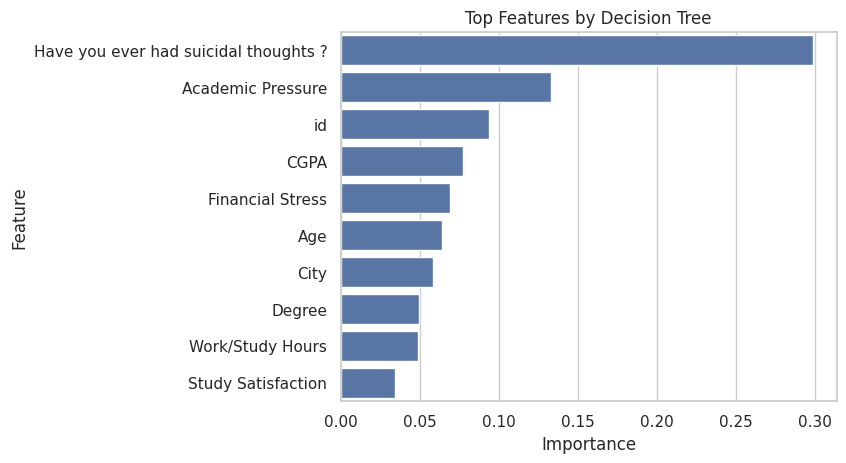

In [ ]:
sns.barplot(x='Importance', y='Feature', data=tree_df.head(10))
plt.title('Top Features by Decision Tree')
plt.show()

c. Compare Overlap – Frequency of Features

In [ ]:
final_features.reset_index(inplace=True)
final_features.columns = ['Feature', 'Frequency']
sns.barplot(x='Frequency', y='Feature', data=final_features)
plt.title('Most Frequently Selected Features')
plt.show()

NameError: name 'final_features' is not defined

d. Correlation Heatmap – Feature Relationships

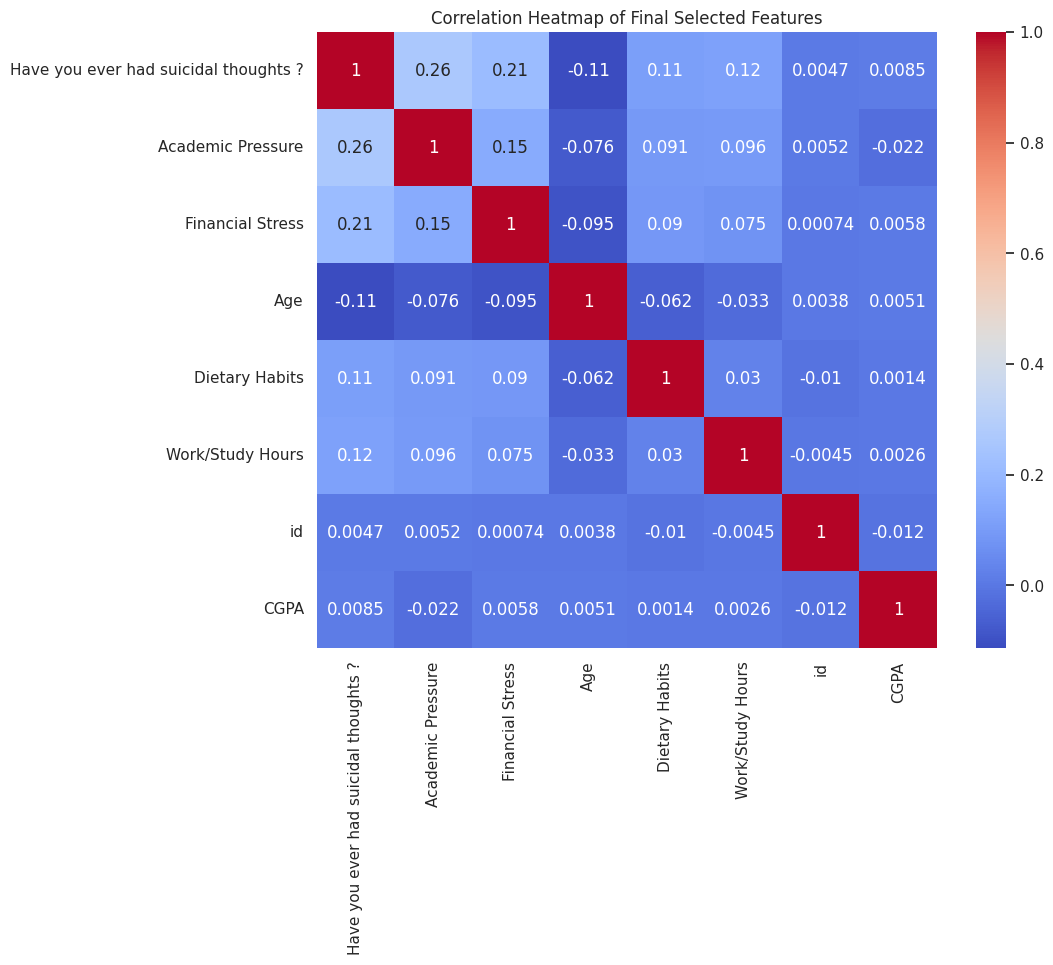

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(X[final_features['Feature']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Final Selected Features')
plt.show()

Visual Insights:
A correlation heatmap highlighted strong positive associations between:

Academic Pressure ↔ Depression

Financial Stress ↔ Depression

Bar plots of feature importance emphasized the weight of subjective well-being factors like Study Satisfaction and Sleep Duration.

Individuals with a history of suicidal thoughts and those reporting low satisfaction or high pressure were significantly more likely to be labeled as depressed.

Interpretation:
The analysis suggests that mental health among students is heavily influenced by both environmental (academic/workload) and personal (sleep, family history, emotional state) factors. Interventions should ideally target stress reduction, better sleep hygiene, and early counseling support, especially for students showing early signs of distress.


 Among the most important predictors identified were:

	1.	Academic Pressure: There is a strong correlation between high academic pressure and the likelihood of depression. Students under more academic stress are more prone to depressive symptoms.

	2.	Financial Stress: Financial difficulties were also closely linked to depression, indicating that economic challenges contribute heavily to students’ mental health struggles.

	3.	Suicidal Thoughts: Students who reported having suicidal thoughts were more likely to be depressed, emphasizing the importance of addressing mental health at early signs of distress.

	4.	Work/Study Hours: Long work/study hours were associated with depression, likely due to the cumulative stress and lack of balance in students’ lives.
  
	5.	Sleep Duration: Poor sleep habits (e.g., less than 5 hours of sleep or irregular sleep patterns) were correlated with higher depression rates. This highlights the importance of sleep hygiene as a factor in mental well-being.